_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [5]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="Differences between age groups">{Use Case Name}</div>

<div class="Adersh"><b>Authored by: </b> {Author/s}</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, Data Analysis, Data Visualization}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{User Story:
As a data analyst, I want to compare the wellbeing of different demographic groups (young people, old people, workers, and families) so that I can identify key differences and overlaps to inform better policy-making and resource allocation.}

<div class="usecase-section-header"></div>

At the end of this use case you will:
- {What this use case will teach you:}
Gain skills in collecting and cleaning demographic and wellbeing data
Learn to perform comparative statistical analysis
Develop the ability to visualize and interpret data
Understand how to derive actionable insights from data analysis
Improve your reporting and recommendation skills

<div class="usecase-section-header">{Introduction}</div>

{This use case aims to analyze the wellbeing of various demographic groups, focusing on young people, old people, workers, and families. The objective is to identify key differences and overlaps in aspects of wellbeing, such as physical health, mental health, economic stability, and social engagement. Understanding these differences can help inform policy-makers and community service providers, leading to more effective resource allocation and better-targeted interventions.

By the end of this use case, participants will be able to perform comprehensive data analysis using Python, interpret the results, and provide data-driven recommendations. The datasets used in this analysis will be sourced from the Melbourne Open Data Portal, specifically targeting demographic and wellbeing indicators.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```

In [1]:
import requests
import pandas as pd
from io import StringIO

def collect_data(dataset_id):
    base_url = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/"
    apikey = "987320be53114f70fc0477fef574765cd9faa558cc437d920683b7c0"
    
    format = 'csv'
    
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'Australia/Melbourne',
        'api_key': apikey
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        url_content = response.content.decode('utf-8-sig')
        
        # Preview the first few lines of the raw data
        print("Raw Data Preview:")
        print("\n".join(url_content.split("\n")[:10]))
        
        try:
            dataset = pd.read_csv(StringIO(url_content), delimiter=';', on_bad_lines='skip')
            return dataset
        except pd.errors.ParserError as e:
            print(f'Parsing Error: {e}')
            return None
    else:
        print(f'Request failed with status code {response.status_code}')
        return None

# Collect data for older people profile
older_people_data = collect_data('older-people-profile-2016-60-years-and-over')

# Collect data for younger people profile
younger_people_data = collect_data('younger-people-profile-2016-15-24-years')

print("\nOlder People Profile Dataset:")
print(older_people_data.head())

print("\nYounger People Profile Dataset:")
print(younger_people_data.head())

print("\nOlder People Profile Dataset Shape:", older_people_data.shape)
print("Younger People Profile Dataset Shape:", younger_people_data.shape)

Raw Data Preview:
profile;census_year;category;sub_category;sub_order;value
Older people (60 years and over);2016;Gender;Female;2;6484
Older people (60 years and over);2016;Age;Under 60 years;1;0
Older people (60 years and over);2016;Age;65-69 years;3;3187
Older people (60 years and over);2016;Age;70-74 years;4;2102
Older people (60 years and over);2016;Age;75-79 years;5;1379
Older people (60 years and over);2016;Age and gender;Male 60-64 years;2;1781
Older people (60 years and over);2016;Age and gender;Male 65-69 years;3;1574
Older people (60 years and over);2016;Age and gender;Male 70-74 years;4;1089
Older people (60 years and over);2016;Age and gender;Male 75-79 years;5;686
Raw Data Preview:
profile;census_year;category;sub_category;sub_order;value
Younger people (15-24 years);2016;Providing child care;Cared for own child/children;2;110
Younger people (15-24 years);2016;Providing child care;Not applicable (under 15 years);6;0
Remaining population (0-14 yrs and 25 yrs and over);2016;

#Dataset Info:


RangeIndex: 436 entries, 0 to 435

Data columns (total 6 columns):

 #   Column        Non-Null Count  Dtype 

---  ------        --------------  ----- 

 0   profile       436 non-null    object

 1   census_year   436 non-null    int64 

 2   category      436 non-null    object

 3   sub_category  436 non-null    object

 4   sub_order     436 non-null    int64 

 5   value         436 non-null    int64 

dtypes: int64(3), object(3)

memory usage: 20.6+ KB


Unique values in each column:

profile: 2

census_year: 1

category: 22

sub_category: 190

sub_order: 42

value: 339

In [2]:
# Adding a distinguishing column to each dataset
older_people_data['profile_type'] = 'Older People'
younger_people_data['profile_type'] = 'Younger People'

# Combining both datasets into one DataFrame
combined_data = pd.concat([older_people_data, younger_people_data], ignore_index=True)

print("Combined Dataset:")
print(combined_data.head())

print("\nCombined Dataset Shape:", combined_data.shape)

# Check for missing values
print("\nMissing values in Combined Dataset:")
print(combined_data.isnull().sum())

# Display info about the combined dataset
print("\nCombined Dataset Info:")
print(combined_data.info())

# Display unique values in each column
print("\nUnique values in each column of Combined Dataset:")
for column in combined_data.columns:
    print(f"{column}: {combined_data[column].nunique()}")

# Display sample data for each category
print("\nSample data for each category in Combined Dataset:")
print(combined_data.groupby('category').first())

Combined Dataset:
                            profile  census_year category    sub_category  \
0  Older people (60 years and over)         2016   Gender          Female   
1  Older people (60 years and over)         2016      Age  Under 60 years   
2  Older people (60 years and over)         2016      Age     65-69 years   
3  Older people (60 years and over)         2016      Age     70-74 years   
4  Older people (60 years and over)         2016      Age     75-79 years   

   sub_order  value  profile_type  
0          2   6484  Older People  
1          1      0  Older People  
2          3   3187  Older People  
3          4   2102  Older People  
4          5   1379  Older People  

Combined Dataset Shape: (984, 7)

Missing values in Combined Dataset:
profile         0
census_year     0
category        0
sub_category    0
sub_order       0
value           0
profile_type    0
dtype: int64

Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 9

In [3]:
# Handle Missing Values: Since there are no missing values, we can skip this step.

# Remove Duplicates
combined_data = combined_data.drop_duplicates()

# Standardize Column Names
combined_data.columns = [col.strip().lower().replace(' ', '_') for col in combined_data.columns]

print("Data Cleaning Completed.")
print("\
Combined Dataset after Cleaning:")
print(combined_data.head())

print("\
Combined Dataset Shape after Cleaning:", combined_data.shape)

Data Cleaning Completed.
Combined Dataset after Cleaning:
                            profile  census_year category    sub_category  \
0  Older people (60 years and over)         2016   Gender          Female   
1  Older people (60 years and over)         2016      Age  Under 60 years   
2  Older people (60 years and over)         2016      Age     65-69 years   
3  Older people (60 years and over)         2016      Age     70-74 years   
4  Older people (60 years and over)         2016      Age     75-79 years   

   sub_order  value  profile_type  
0          2   6484  Older People  
1          1      0  Older People  
2          3   3187  Older People  
3          4   2102  Older People  
4          5   1379  Older People  
Combined Dataset Shape after Cleaning: (984, 7)


In [4]:
# Perform Exploratory Data Analysis (EDA)

# Summary Statistics
summary_stats = combined_data.describe(include='all')

# Calculate mode for each column
mode_stats = combined_data.mode().iloc[0]

print("Summary Statistics:")
print(summary_stats)

print("\
Mode for each column:")
print(mode_stats)

Summary Statistics:
                                 profile  census_year        category  \
count                                984        984.0             984   
unique                                 4          NaN              29   
top     Older people (60 years and over)          NaN  Age and gender   
freq                                 274          NaN             124   
mean                                 NaN       2016.0             NaN   
std                                  NaN          0.0             NaN   
min                                  NaN       2016.0             NaN   
25%                                  NaN       2016.0             NaN   
50%                                  NaN       2016.0             NaN   
75%                                  NaN       2016.0             NaN   
max                                  NaN       2016.0             NaN   

       sub_category   sub_order          value  profile_type  
count           984  984.000000     984.

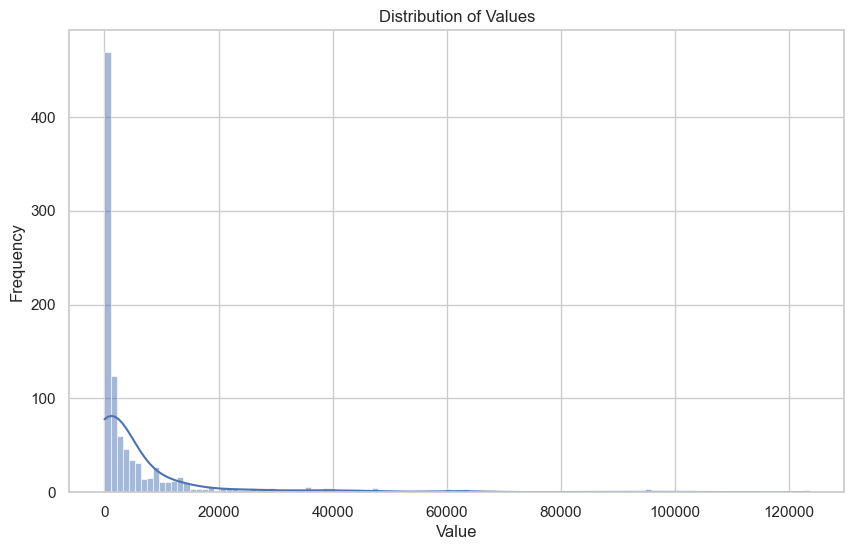

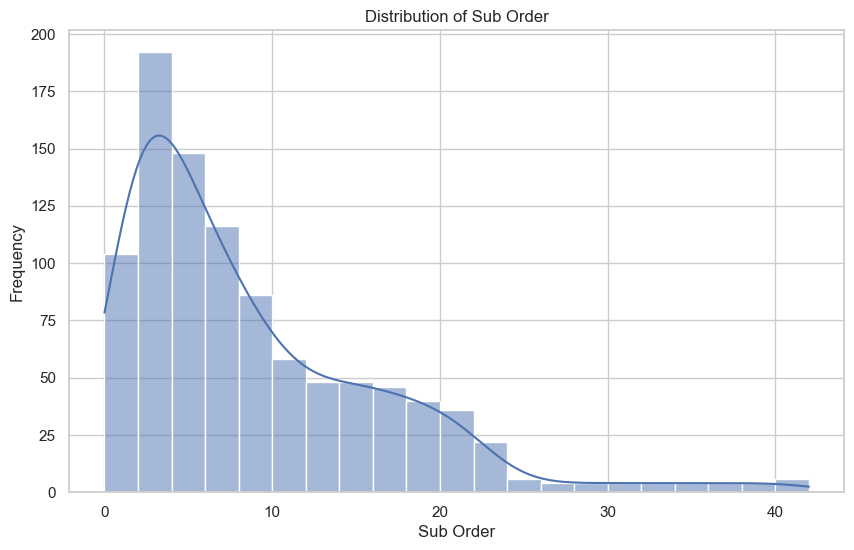

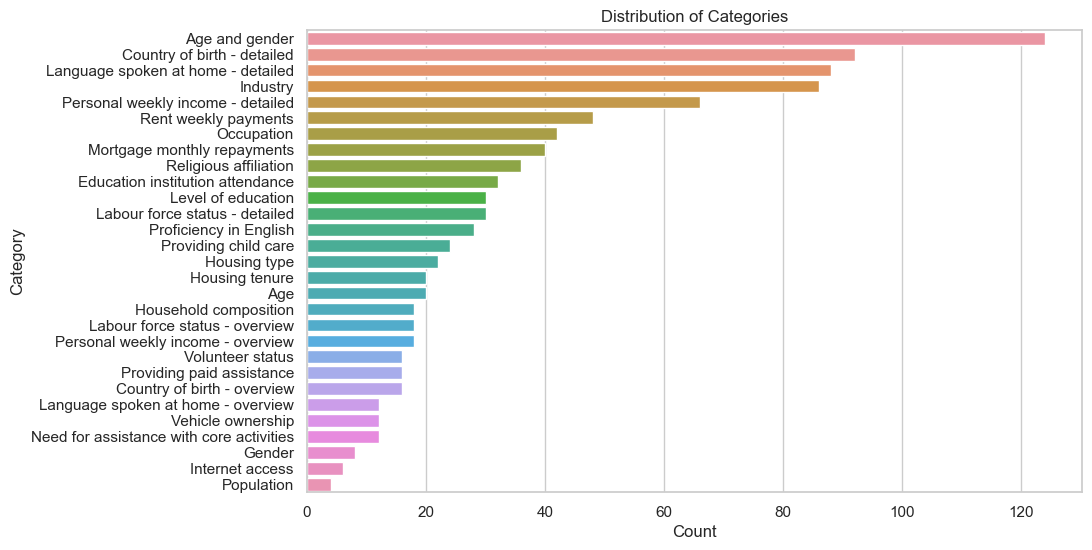

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of the 'value' column
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['value'], kde=True)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the 'sub_order' column
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['sub_order'], kde=True)
plt.title('Distribution of Sub Order')
plt.xlabel('Sub Order')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the 'category' column
plt.figure(figsize=(10, 6))
sns.countplot(y=combined_data['category'], order=combined_data['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

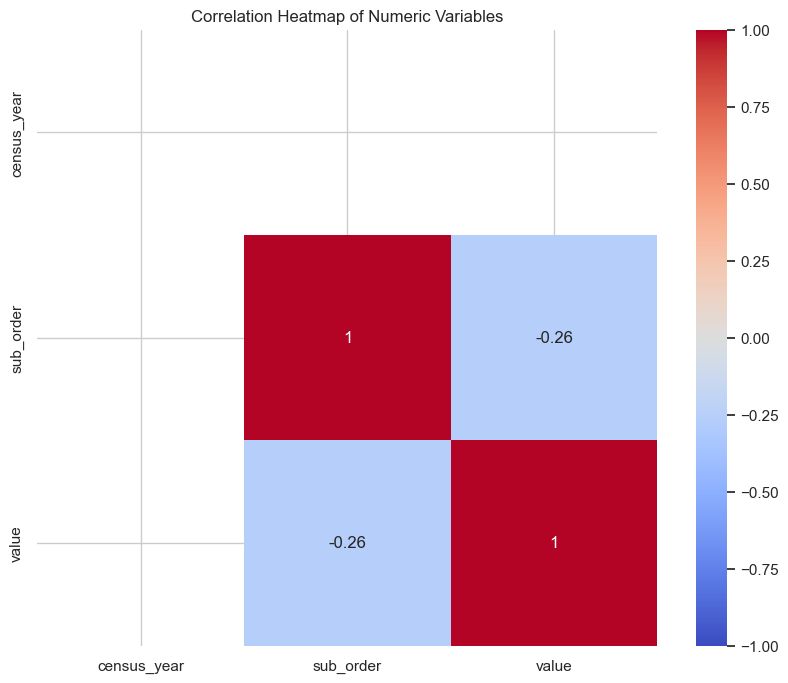

Correlation Matrix:
             census_year  sub_order     value
census_year          NaN        NaN       NaN
sub_order            NaN   1.000000 -0.260246
value                NaN  -0.260246  1.000000
Strong Correlations:


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = combined_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = combined_data[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Identify strong correlations (absolute value > 0.5)
strong_correlations = (correlation_matrix.abs() > 0.5) & (correlation_matrix != 1.0)
print("\
Strong Correlations:")
for col in strong_correlations.columns:
    strong_corr = strong_correlations[col][strong_correlations[col]].index.tolist()
    if strong_corr:
        print(f"{col}: {', '.join(strong_corr)}")

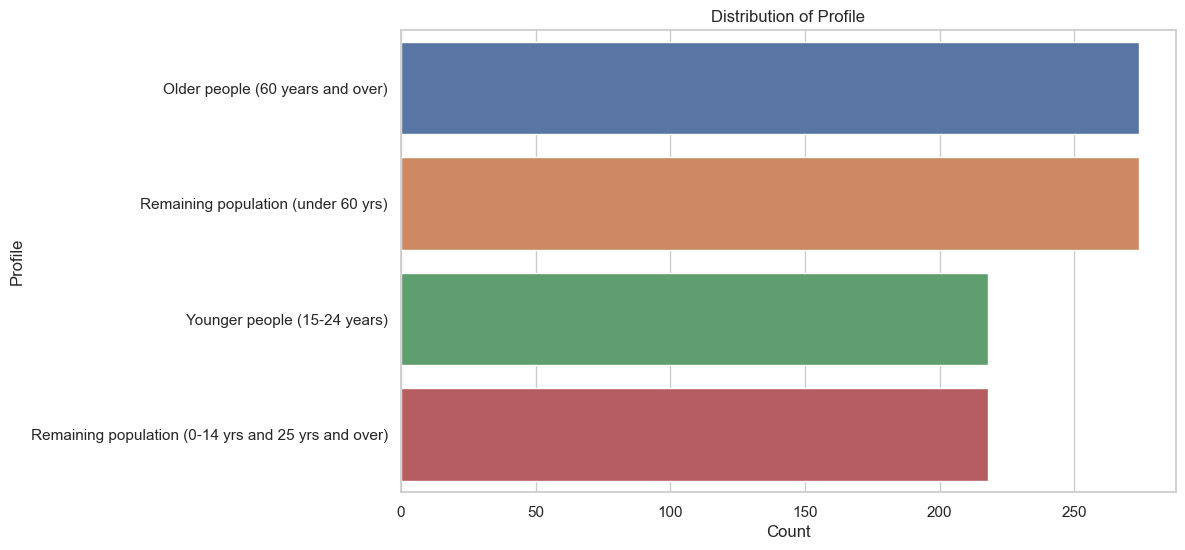

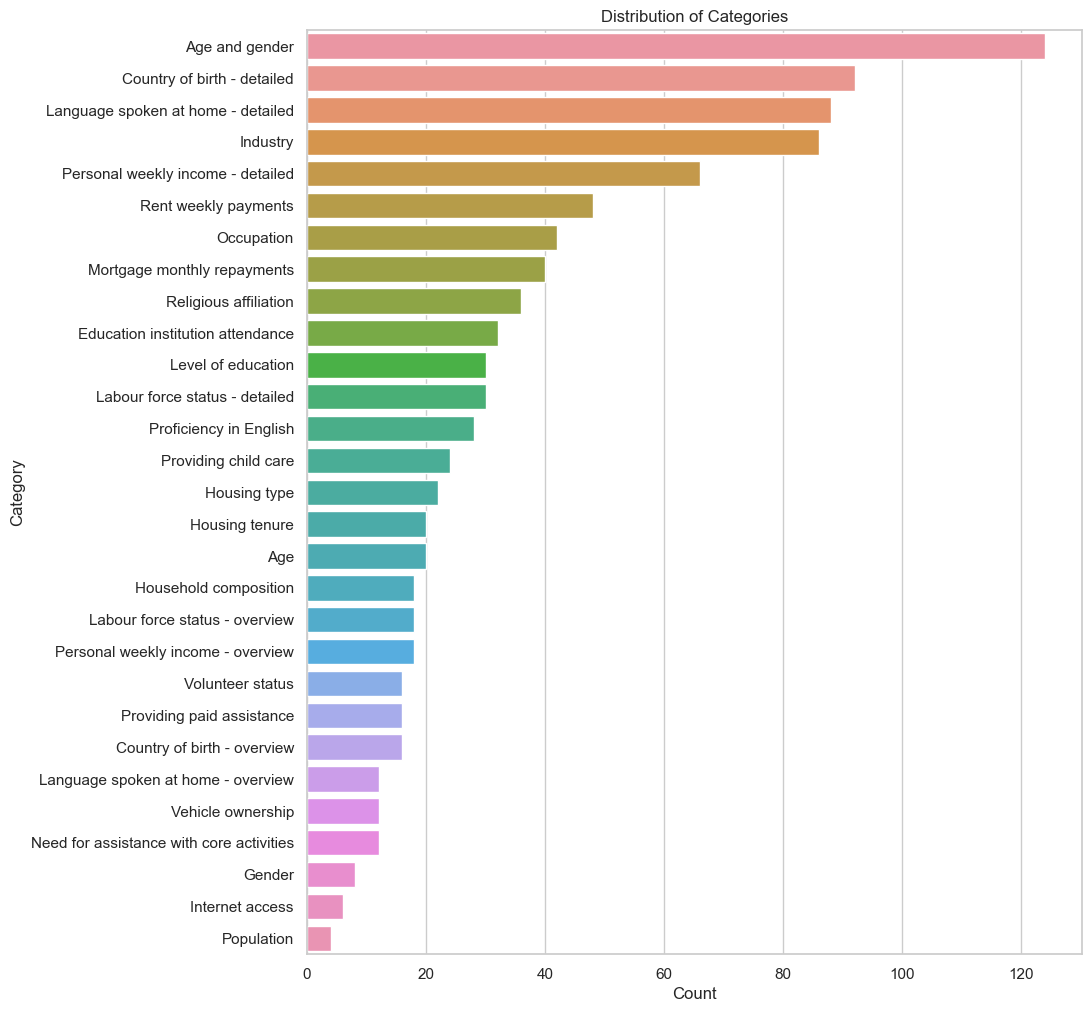

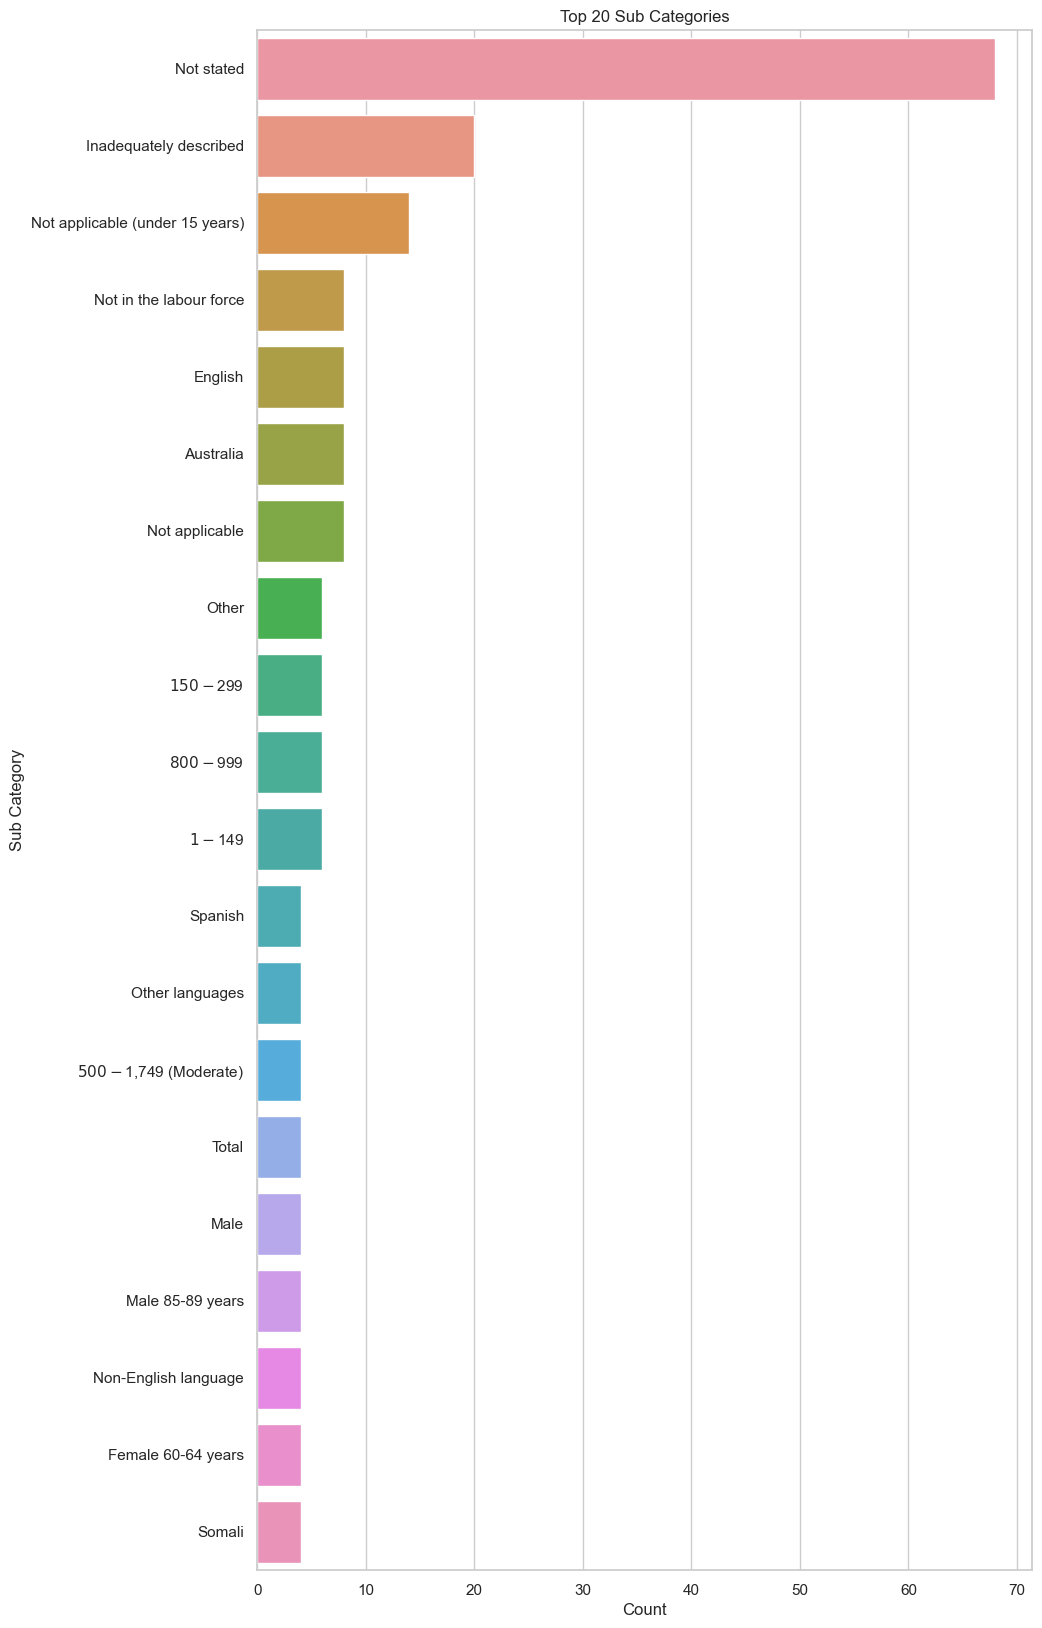

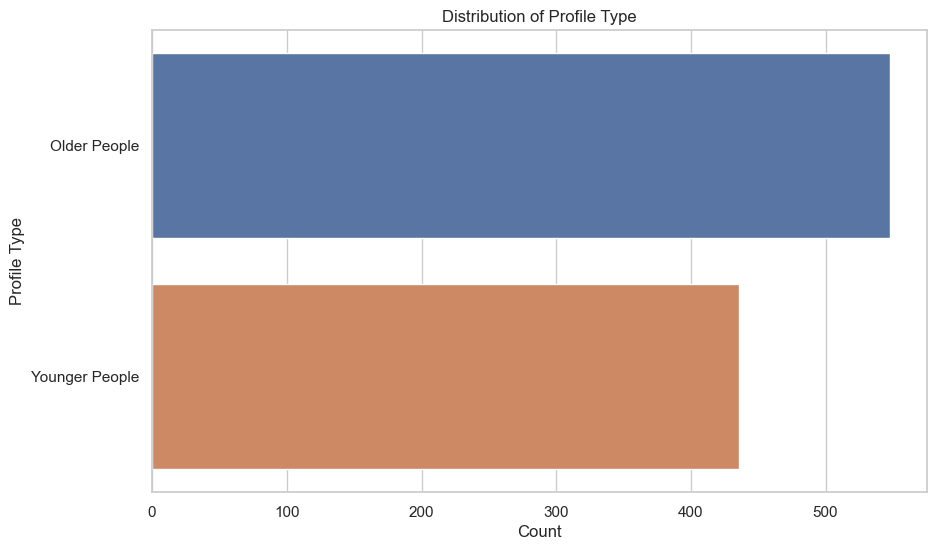

In [7]:
# Plot the distribution of the 'profile' column
plt.figure(figsize=(10, 6))
sns.countplot(y=combined_data['profile'], order=combined_data['profile'].value_counts().index)
plt.title('Distribution of Profile')
plt.xlabel('Count')
plt.ylabel('Profile')
plt.show()

# Plot the distribution of the 'category' column
plt.figure(figsize=(10, 12))
sns.countplot(y=combined_data['category'], order=combined_data['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Plot the distribution of the 'sub_category' column
plt.figure(figsize=(10, 20))
sns.countplot(y=combined_data['sub_category'], order=combined_data['sub_category'].value_counts().index[:20])
plt.title('Top 20 Sub Categories')
plt.xlabel('Count')
plt.ylabel('Sub Category')
plt.show()

# Plot the distribution of the 'profile_type' column
plt.figure(figsize=(10, 6))
sns.countplot(y=combined_data['profile_type'], order=combined_data['profile_type'].value_counts().index)
plt.title('Distribution of Profile Type')
plt.xlabel('Count')
plt.ylabel('Profile Type')
plt.show()

In [8]:
# Feature Engineering: Create new features

# Create a new feature for age groups based on the 'sub_category' column
# This is a simple example and may need to be adjusted based on the actual data
combined_data['age_group'] = combined_data['sub_category'].apply(lambda x: 'Under 60' if 'Under 60' in x else ('60-69' if '60-69' in x else ('70-79' if '70-79' in x else ('80-89' if '80-89' in x else ('90+' if '90+' in x else 'Other')))))

print("Feature Engineering Completed.")
print("\
Combined Dataset with New Feature:")
print(combined_data[['sub_category', 'age_group']].head(10))

Feature Engineering Completed.
Combined Dataset with New Feature:
       sub_category age_group
0            Female     Other
1    Under 60 years  Under 60
2       65-69 years     Other
3       70-74 years     Other
4       75-79 years     Other
5  Male 60-64 years     Other
6  Male 65-69 years     Other
7  Male 70-74 years     Other
8  Male 75-79 years     Other
9  Male 80-84 years     Other


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Normalization/Scaling: Normalize numerical features

# Select numerical columns
numerical_columns = ['value', 'sub_order']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
combined_data[numerical_columns] = scaler.fit_transform(combined_data[numerical_columns])

print("Normalization/Scaling Completed.")
print("\
Combined Dataset with Normalized Features:")
print(combined_data[numerical_columns].describe())

Normalization/Scaling Completed.
Combined Dataset with Normalized Features:
            value   sub_order
count  984.000000  984.000000
mean     0.053715    0.209253
std      0.120424    0.184959
min      0.000000    0.000000
25%      0.001263    0.071429
50%      0.009552    0.142857
75%      0.044442    0.309524
max      1.000000    1.000000


In [10]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Variables: Convert categorical variables to numeric

# Select categorical columns
categorical_columns = ['profile', 'category', 'sub_category', 'profile_type', 'age_group']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    combined_data[f'{col}_encoded'] = le.fit_transform(combined_data[col])

print("Encoding Categorical Variables Completed.")
print("\
Combined Dataset with Encoded Categorical Variables:")
print(combined_data[[col for col in combined_data.columns if col.endswith('_encoded')]].head())

Encoding Categorical Variables Completed.
Combined Dataset with Encoded Categorical Variables:
   profile_encoded  category_encoded  sub_category_encoded  \
0                0                 5                   103   
1                0                 0                   283   
2                0                 0                    59   
3                0                 0                    60   
4                0                 0                    61   

   profile_type_encoded  age_group_encoded  
0                     0                  0  
1                     0                  1  
2                     0                  0  
3                     0                  0  
4                     0                  0  


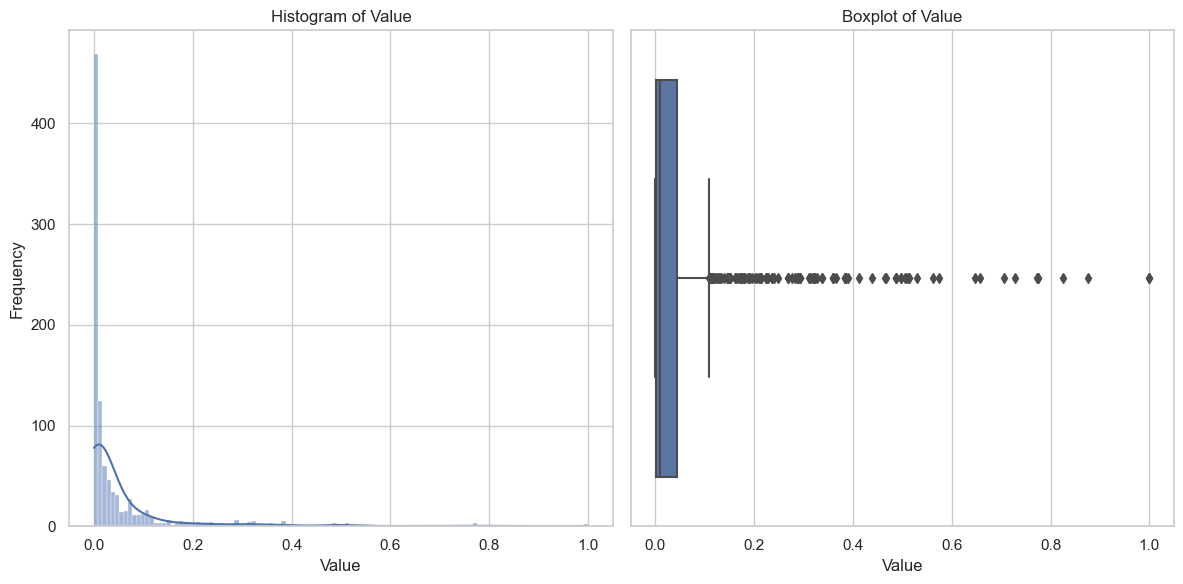

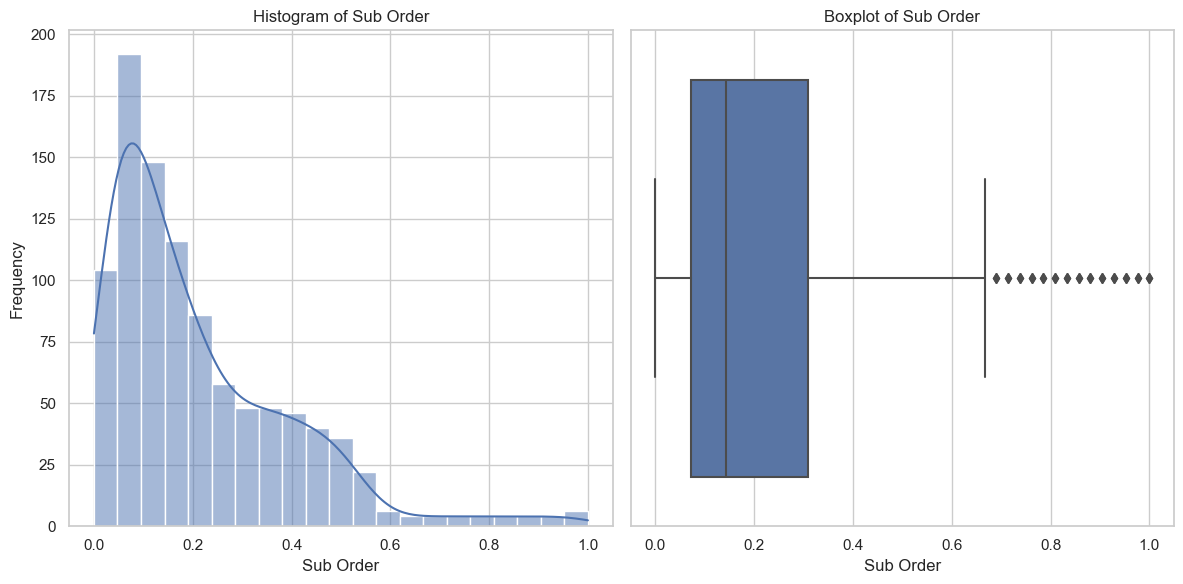

In [11]:
# Histograms and Boxplots for Numeric Variables

# Plot histogram and boxplot for 'value' column
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(combined_data['value'], kde=True)
plt.title('Histogram of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=combined_data['value'])
plt.title('Boxplot of Value')
plt.xlabel('Value')

plt.tight_layout()
plt.show()

# Plot histogram and boxplot for 'sub_order' column
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(combined_data['sub_order'], kde=True)
plt.title('Histogram of Sub Order')
plt.xlabel('Sub Order')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=combined_data['sub_order'])
plt.title('Boxplot of Sub Order')
plt.xlabel('Sub Order')

plt.tight_layout()
plt.show()

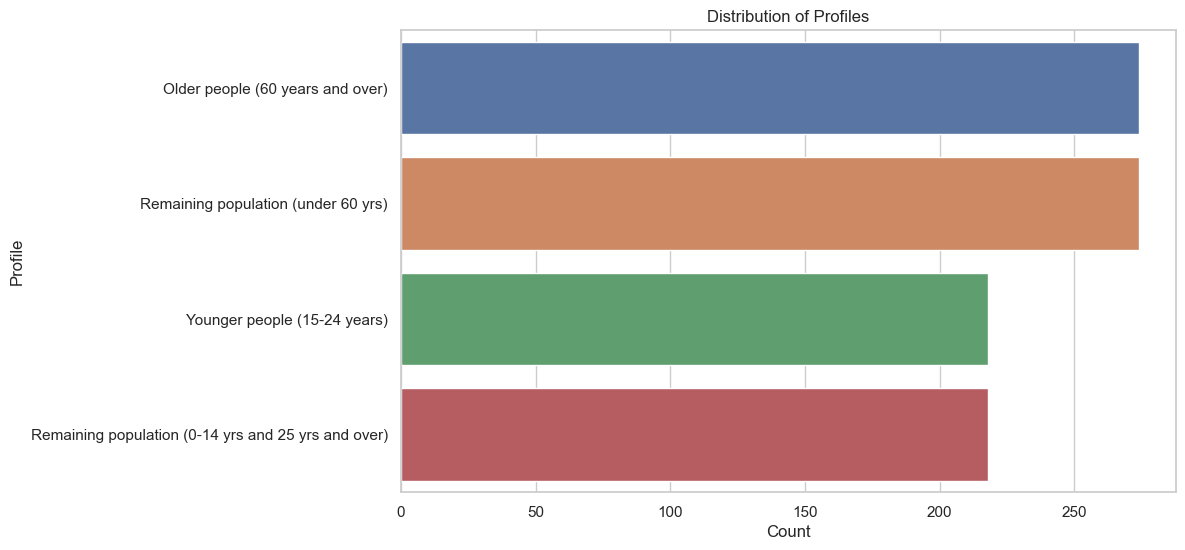

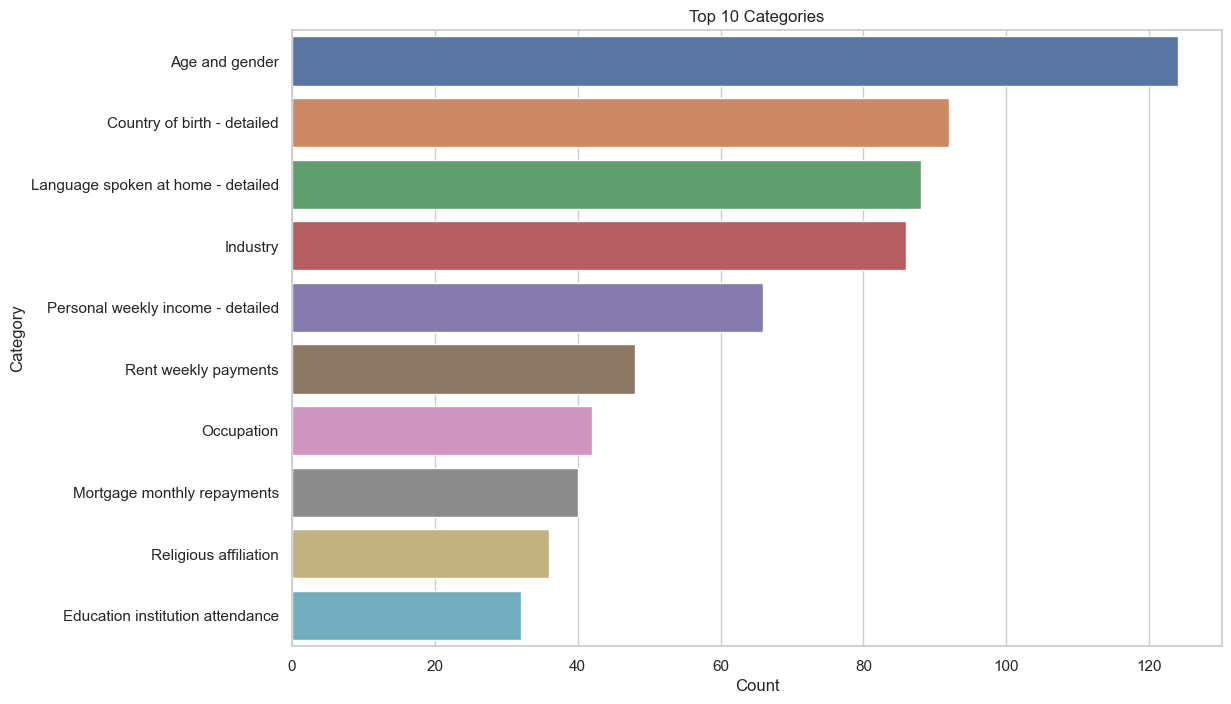

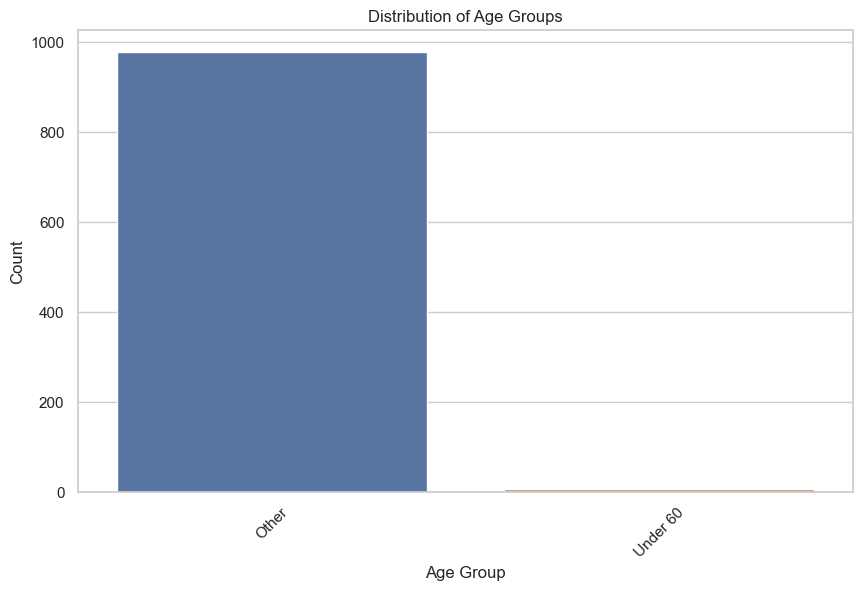

In [12]:
# Bar Charts for Categorical Data

# Bar chart for 'profile' column
plt.figure(figsize=(10, 6))
sns.countplot(y=combined_data['profile'], order=combined_data['profile'].value_counts().index)
plt.title('Distribution of Profiles')
plt.xlabel('Count')
plt.ylabel('Profile')
plt.show()

# Bar chart for 'category' column (top 10 categories)
plt.figure(figsize=(12, 8))
sns.countplot(y=combined_data['category'], order=combined_data['category'].value_counts().index[:10])
plt.title('Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Bar chart for 'age_group' column
plt.figure(figsize=(10, 6))
sns.countplot(x=combined_data['age_group'], order=combined_data['age_group'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

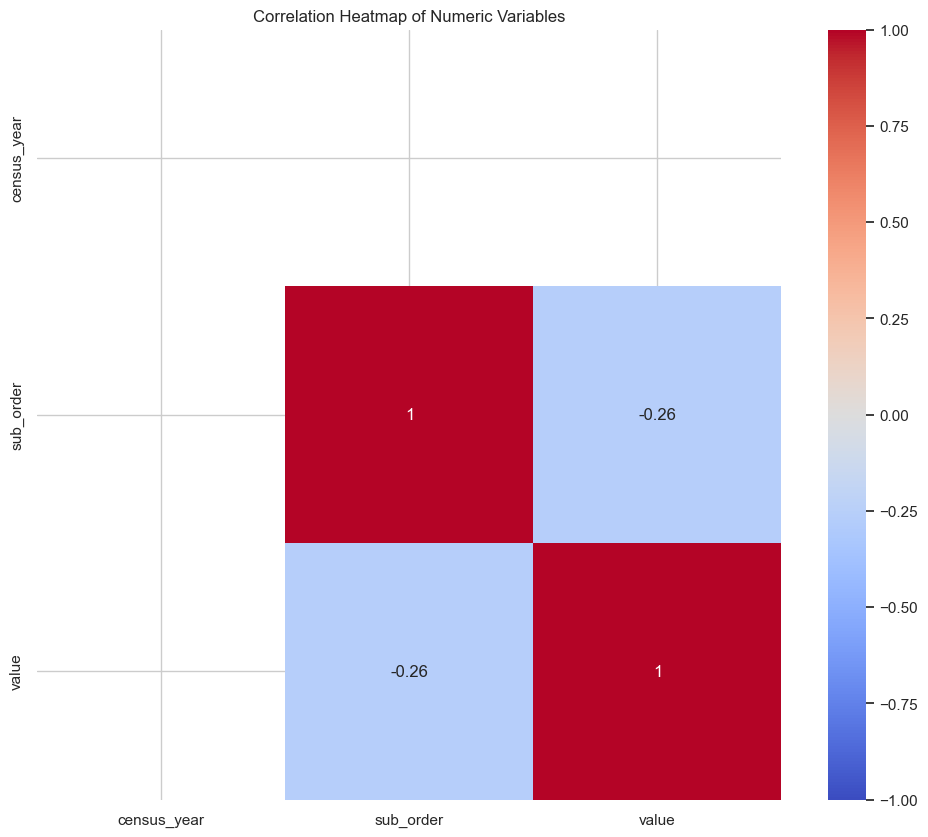

Correlation Matrix:
             census_year  sub_order     value
census_year          NaN        NaN       NaN
sub_order            NaN   1.000000 -0.260246
value                NaN  -0.260246  1.000000


In [13]:
# Heatmap for Correlations

# Select numeric columns
numeric_columns = combined_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = combined_data[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)